### FCM

In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from numpy import linalg as LA


In [3]:
import os
from os import listdir
from os.path import isfile, join
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from numpy import linalg as LA
class FCM():
    def __init__(self, image, image_bit, n_clusters, m, epsilon, max_iter):
        '''Modified Fuzzy C-means clustering

        <image>: 2D array, grey scale image.
        <n_clusters>: int, number of clusters/segments to create.
        <m>: float > 1, fuzziness parameter. A large <m> results in smaller
             membership values and fuzzier clusters. Commonly set to 2.
        <max_iter>: int, max number of iterations.
        '''

        self.image = image
        self.image_bit = image_bit
        self.n_clusters = n_clusters
        self.m = m
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.J = np.inf

        self.shape = image.shape # image shape
        self.X = image.flatten().astype('float') # flatted image shape: (number of pixels,1)
        self.numPixels = image.size

    #---------------------------------------------
    def initial_U(self):
        U=np.zeros((self.numPixels, self.n_clusters))
        idx = np.arange(self.numPixels)
        for ii in range(self.n_clusters):
            idxii = idx%self.n_clusters==ii
            U[idxii,ii] = 1
        return U

    def update_U(self):
        '''Compute weights'''
        c_mesh,idx_mesh = np.meshgrid(self.C,self.X)
        power = 2./(self.m-1)
        p1 = abs(idx_mesh-c_mesh)**power
        p2 = np.sum((1./abs(idx_mesh-c_mesh))**power,axis=1)

        return 1./(p1*p2[:,None])

    def update_C(self):
        '''Compute centroid of clusters'''
        numerator = np.dot(self.X,self.U**self.m)
        denominator = np.sum(self.U**self.m,axis=0)
        return numerator/denominator




    def form_clusters(self):
        '''Iterative training'''
        d = 100
        self.U = self.initial_U()
        if self.max_iter != -1:
            i = 0
            while True:
                self.C = self.update_C()
                old_u = np.copy(self.U)
                self.U = self.update_U()
                #d = np.sum(abs(self.U - old_u))
                J_old = self.J
                self.J = self.objectivFunction()
                print("Iteration %d : cost = %f" %(i, self.J))

                if J_old - self.J < self.epsilon or i > self.max_iter:
                    break
                i+=1

        self.segmentImage()


    def deFuzzify(self):
        return np.argmax(self.U, axis = 1)

    def segmentImage(self):
        '''Segment image based on max weights'''

        result = self.deFuzzify()
        self.result = result.reshape(self.shape).astype('int')

        return self.result
    def objectivFunction(self):
      J = 0
      for i in range(self.X.shape[0]):
        for j in range(self.C.shape[0]):
          J = J+ (self.U[i,j]**self.m) * (LA.norm(self.X[i]-self.C[j])**2)
      return J



In [7]:

def segment(path):
      # Load the minc file
      img = nib.load(path)

      # Get the data as a numpy array
      data = img.get_fdata()

      # Select a slice to plot (e.g. the 10th slice along the third axis)
      slice = data[90, :, :]
      num_bit = 8
      num_cluster = 4
      fuzziness = 2
      epsilon = 0.05
      max_iteration = 100
      cluster = FCM(slice, image_bit= num_bit, n_clusters= num_cluster, m= fuzziness, epsilon= epsilon, max_iter= max_iteration)
      cluster.form_clusters()
      result=cluster.result
      fig=plt.figure(figsize=(12,8),dpi=100)
      ax1=fig.add_subplot(1,2,1)
      ax1.imshow(slice,cmap='gray')
      ax1.set_title('image')
      ax2=fig.add_subplot(1,2,2)
      ax2.imshow(result)
      ax2.set_title('segmentation')
      plt.show(block=False)
      plt.close()

Iteration 0 : cost = 838738808.346106
Iteration 1 : cost = 838732667.812830
Iteration 2 : cost = 838635162.711491
Iteration 3 : cost = 837119412.620407
Iteration 4 : cost = 815944002.006255
Iteration 5 : cost = 638341542.844453
Iteration 6 : cost = 308888730.879103
Iteration 7 : cost = 110923511.677010
Iteration 8 : cost = 63140283.281953
Iteration 9 : cost = 59718926.683087
Iteration 10 : cost = 59617531.656777
Iteration 11 : cost = 59612995.206593
Iteration 12 : cost = 59612405.964138
Iteration 13 : cost = 59612281.762697
Iteration 14 : cost = 59612252.989630
Iteration 15 : cost = 59612246.172392
Iteration 16 : cost = 59612244.544036
Iteration 17 : cost = 59612244.153752
Iteration 18 : cost = 59612244.060060
Iteration 19 : cost = 59612244.037550


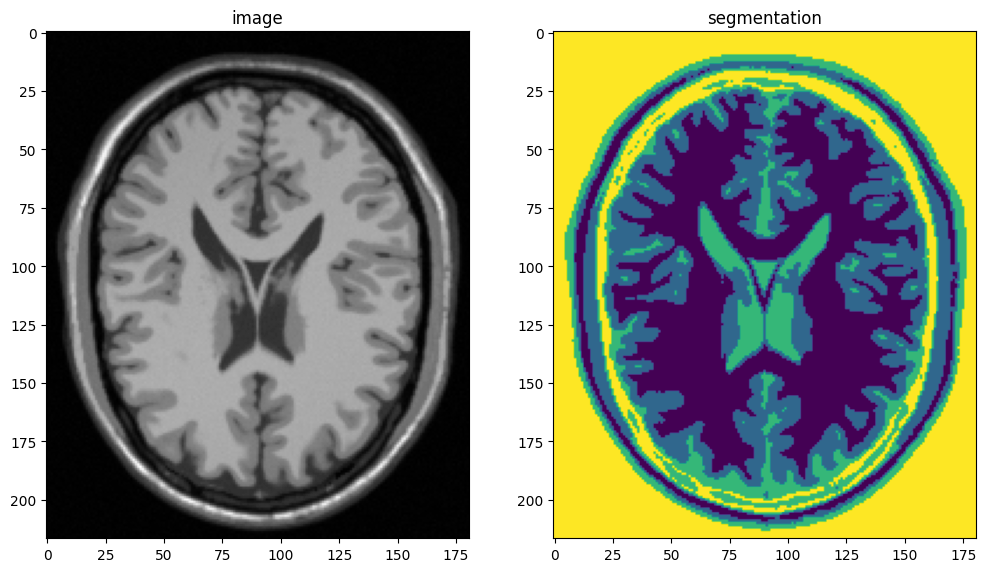

In [8]:
segment('/content/t1_icbm_normal_1mm_pn1_rf20.mnc')

Iteration 0 : cost = 781078563.193899
Iteration 1 : cost = 781077357.437733
Iteration 2 : cost = 781058168.831221
Iteration 3 : cost = 780756754.530062
Iteration 4 : cost = 776254319.124138
Iteration 5 : cost = 723234715.637355
Iteration 6 : cost = 474771485.719814
Iteration 7 : cost = 215395282.778746
Iteration 8 : cost = 143977498.685640
Iteration 9 : cost = 133980819.771486
Iteration 10 : cost = 132070087.329209
Iteration 11 : cost = 126657870.451197
Iteration 12 : cost = 119120143.293711
Iteration 13 : cost = 109161168.019466
Iteration 14 : cost = 96043174.592795
Iteration 15 : cost = 81257701.373477
Iteration 16 : cost = 67765565.215294
Iteration 17 : cost = 59594495.525742
Iteration 18 : cost = 56461401.694424
Iteration 19 : cost = 55586060.613195
Iteration 20 : cost = 55373635.615632
Iteration 21 : cost = 55324392.472143
Iteration 22 : cost = 55313116.016743
Iteration 23 : cost = 55310540.736350
Iteration 24 : cost = 55309952.842224
Iteration 25 : cost = 55309818.633186
Iteratio

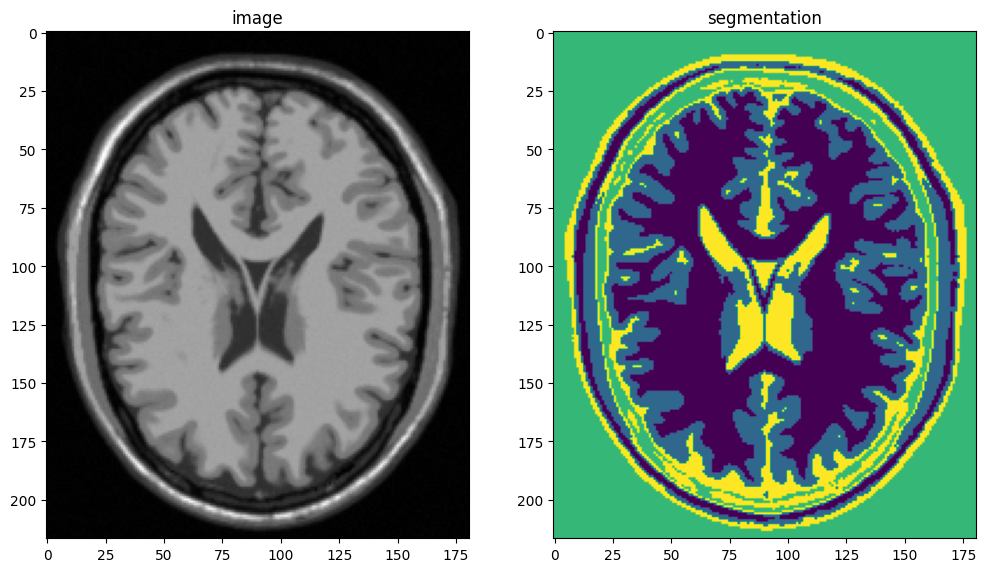

In [9]:
segment('/content/t1_icbm_normal_1mm_pn1_rf0.mnc')

Iteration 0 : cost = 750642581.177699
Iteration 1 : cost = 750638074.565290
Iteration 2 : cost = 750566407.204402
Iteration 3 : cost = 749450819.863733
Iteration 4 : cost = 733657989.751573
Iteration 5 : cost = 591482074.050182
Iteration 6 : cost = 292998085.589934
Iteration 7 : cost = 109838765.277810
Iteration 8 : cost = 62311653.881043
Iteration 9 : cost = 59271239.899199
Iteration 10 : cost = 59176392.276685
Iteration 11 : cost = 59171431.279931
Iteration 12 : cost = 59170611.970460
Iteration 13 : cost = 59170404.469992
Iteration 14 : cost = 59170348.834234
Iteration 15 : cost = 59170333.807997
Iteration 16 : cost = 59170329.743360
Iteration 17 : cost = 59170328.643252
Iteration 18 : cost = 59170328.345433
Iteration 19 : cost = 59170328.264799
Iteration 20 : cost = 59170328.242964


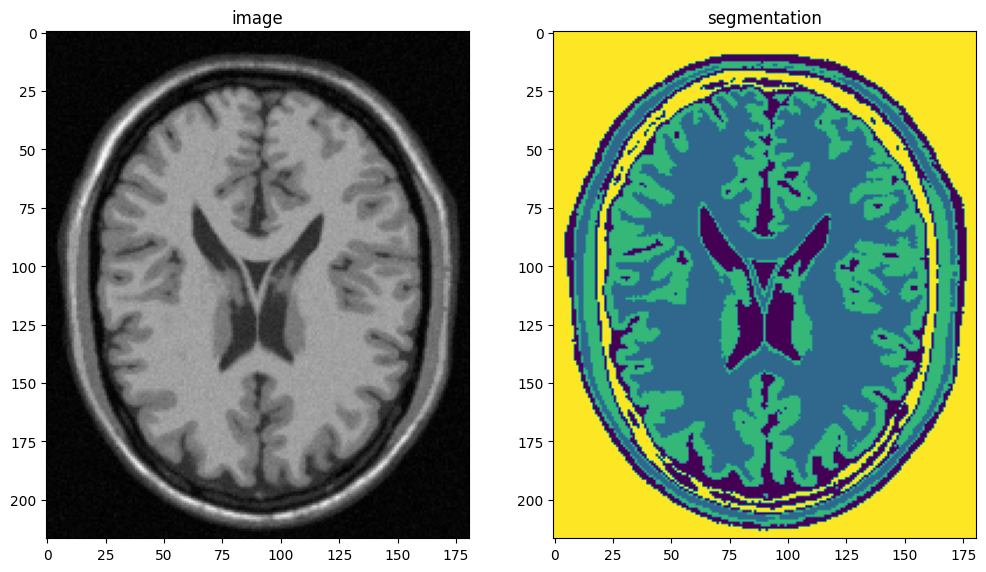

In [10]:
segment('/content/t1_icbm_normal_1mm_pn3_rf0.mnc')

Iteration 0 : cost = 808036429.627076
Iteration 1 : cost = 808021984.381671
Iteration 2 : cost = 807794039.462912
Iteration 3 : cost = 804336279.562755
Iteration 4 : cost = 760906168.281801
Iteration 5 : cost = 520624072.561615
Iteration 6 : cost = 238646396.446715
Iteration 7 : cost = 98778947.923984
Iteration 8 : cost = 67772691.361779
Iteration 9 : cost = 64166353.659311
Iteration 10 : cost = 63497653.522435
Iteration 11 : cost = 63334615.563949
Iteration 12 : cost = 63292304.810823
Iteration 13 : cost = 63281006.868503
Iteration 14 : cost = 63277934.823731
Iteration 15 : cost = 63277090.456972
Iteration 16 : cost = 63276857.012623
Iteration 17 : cost = 63276792.276101
Iteration 18 : cost = 63276774.296982
Iteration 19 : cost = 63276769.300027
Iteration 20 : cost = 63276767.910739
Iteration 21 : cost = 63276767.524416
Iteration 22 : cost = 63276767.416982
Iteration 23 : cost = 63276767.387104


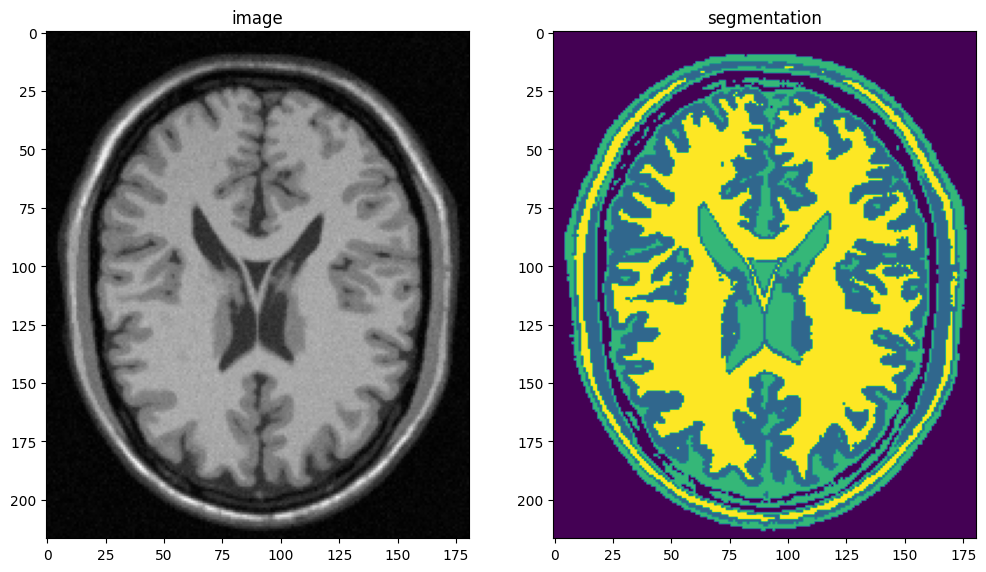

In [11]:
segment('/content/t1_icbm_normal_1mm_pn3_rf20.mnc')

Iteration 0 : cost = 724212370.488689
Iteration 1 : cost = 724167096.421363
Iteration 2 : cost = 723460402.332308
Iteration 3 : cost = 713211697.164941
Iteration 4 : cost = 610785001.112021
Iteration 5 : cost = 321025747.921102
Iteration 6 : cost = 148333575.586060
Iteration 7 : cost = 83727082.523128
Iteration 8 : cost = 72685695.864209
Iteration 9 : cost = 70639620.875467
Iteration 10 : cost = 69988898.490559
Iteration 11 : cost = 69757973.801567
Iteration 12 : cost = 69674036.800161
Iteration 13 : cost = 69643135.775571
Iteration 14 : cost = 69631659.607632
Iteration 15 : cost = 69627372.129497
Iteration 16 : cost = 69625764.094683
Iteration 17 : cost = 69625159.500587
Iteration 18 : cost = 69624931.831340
Iteration 19 : cost = 69624846.016953
Iteration 20 : cost = 69624813.652329
Iteration 21 : cost = 69624801.441738
Iteration 22 : cost = 69624796.833898
Iteration 23 : cost = 69624795.094824
Iteration 24 : cost = 69624794.438420
Iteration 25 : cost = 69624794.190652
Iteration 26 : 

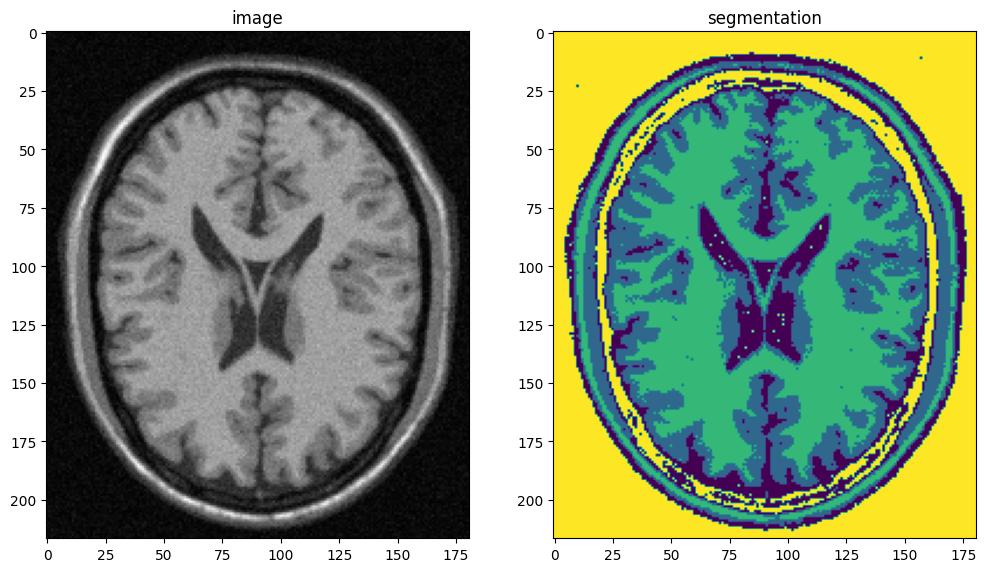

In [12]:
segment('/content/t1_icbm_normal_1mm_pn5_rf0.mnc')

Iteration 0 : cost = 701570631.007790
Iteration 1 : cost = 701489832.876460
Iteration 2 : cost = 700243091.775498
Iteration 3 : cost = 683225396.904283
Iteration 4 : cost = 548706898.858262
Iteration 5 : cost = 277131396.090965
Iteration 6 : cost = 132608808.296966
Iteration 7 : cost = 92450582.150516
Iteration 8 : cost = 85311032.870974
Iteration 9 : cost = 83245808.950630
Iteration 10 : cost = 82356967.321718
Iteration 11 : cost = 81936409.931907
Iteration 12 : cost = 81730676.808810
Iteration 13 : cost = 81627935.199756
Iteration 14 : cost = 81575862.100148
Iteration 15 : cost = 81549185.564336
Iteration 16 : cost = 81535414.028967
Iteration 17 : cost = 81528265.500523
Iteration 18 : cost = 81524540.327519
Iteration 19 : cost = 81522593.697216
Iteration 20 : cost = 81521574.446010
Iteration 21 : cost = 81521040.012278
Iteration 22 : cost = 81520759.503358
Iteration 23 : cost = 81520612.165187
Iteration 24 : cost = 81520534.734898
Iteration 25 : cost = 81520494.027829
Iteration 26 : 

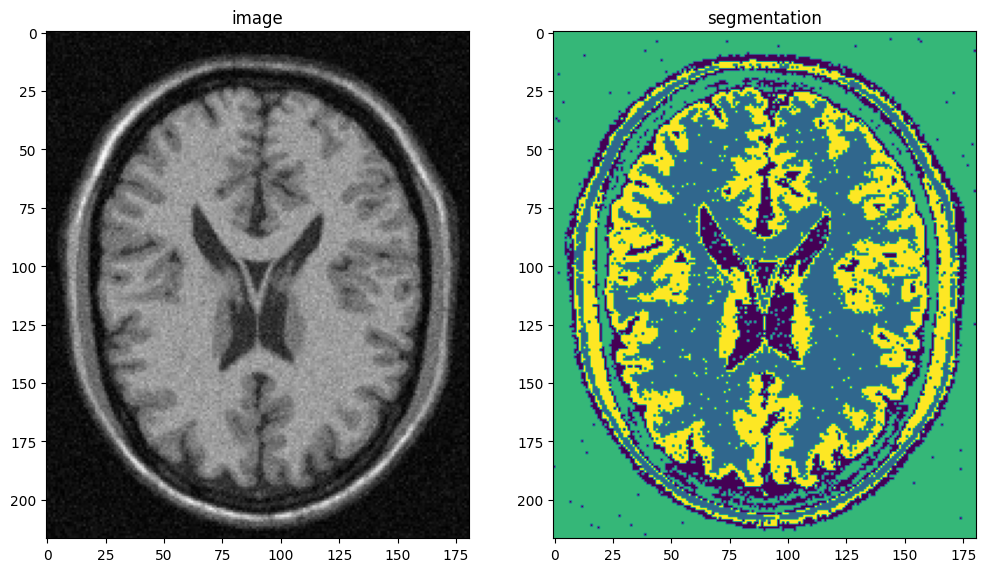

In [13]:
segment('/content/t1_icbm_normal_1mm_pn7_rf0.mnc')

Iteration 0 : cost = 755151095.852668
Iteration 1 : cost = 755030069.278476
Iteration 2 : cost = 753168357.337210
Iteration 3 : cost = 728536401.802684
Iteration 4 : cost = 552529199.692968
Iteration 5 : cost = 266288074.989487
Iteration 6 : cost = 128573048.659701
Iteration 7 : cost = 93064916.298734
Iteration 8 : cost = 87489956.722659
Iteration 9 : cost = 85933691.888796
Iteration 10 : cost = 85266500.305159
Iteration 11 : cost = 84950562.626937
Iteration 12 : cost = 84796368.327598
Iteration 13 : cost = 84719831.564355
Iteration 14 : cost = 84681393.713647
Iteration 15 : cost = 84661927.500951
Iteration 16 : cost = 84652010.278021
Iteration 17 : cost = 84646936.506435
Iteration 18 : cost = 84644332.950409
Iteration 19 : cost = 84642994.142259
Iteration 20 : cost = 84642304.668989
Iteration 21 : cost = 84641949.221440
Iteration 22 : cost = 84641765.838220
Iteration 23 : cost = 84641671.176279
Iteration 24 : cost = 84641622.293412
Iteration 25 : cost = 84641597.043741
Iteration 26 : 

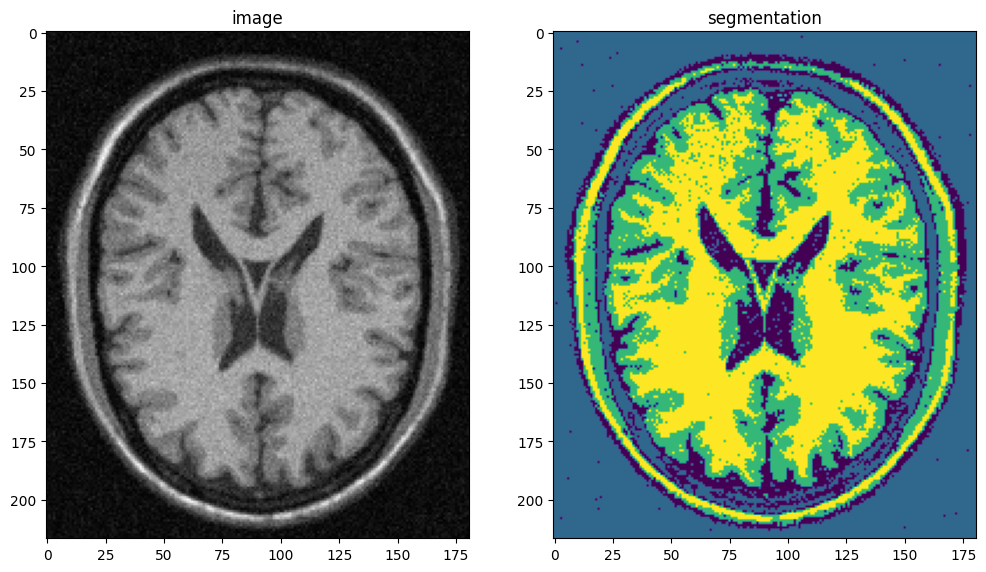

In [14]:
segment('/content/t1_icbm_normal_1mm_pn7_rf20.mnc')

Iteration 0 : cost = 734515818.860279
Iteration 1 : cost = 734349190.572888
Iteration 2 : cost = 731828674.775519
Iteration 3 : cost = 700171393.746404
Iteration 4 : cost = 496416571.225603
Iteration 5 : cost = 215896637.014274
Iteration 6 : cost = 144689335.296055
Iteration 7 : cost = 125758915.718483
Iteration 8 : cost = 108342312.984824
Iteration 9 : cost = 102250619.517986
Iteration 10 : cost = 100625055.325990
Iteration 11 : cost = 99749100.069202
Iteration 12 : cost = 99066268.473733
Iteration 13 : cost = 98513188.725879
Iteration 14 : cost = 98074075.631044
Iteration 15 : cost = 97733943.841134
Iteration 16 : cost = 97476332.301882
Iteration 17 : cost = 97284964.938794
Iteration 18 : cost = 97145112.600697
Iteration 19 : cost = 97044288.595428
Iteration 20 : cost = 96972411.771525
Iteration 21 : cost = 96921639.769345
Iteration 22 : cost = 96886043.667387
Iteration 23 : cost = 96861239.429770
Iteration 24 : cost = 96844041.072772
Iteration 25 : cost = 96832164.629685
Iteration 2

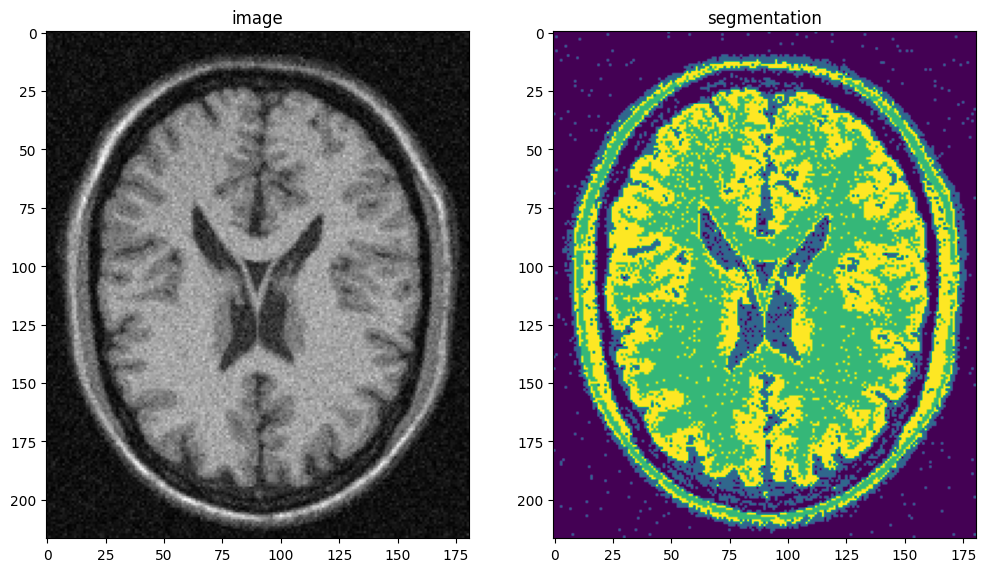

In [15]:
segment('/content/t1_icbm_normal_1mm_pn9_rf20.mnc')

Iteration 0 : cost = 779294712.492837
Iteration 1 : cost = 779283403.859952
Iteration 2 : cost = 779104241.697104
Iteration 3 : cost = 776352710.676345
Iteration 4 : cost = 740001008.324588
Iteration 5 : cost = 504572024.049720
Iteration 6 : cost = 228753764.388782
Iteration 7 : cost = 116861205.752081
Iteration 8 : cost = 78728771.275509
Iteration 9 : cost = 73833096.947967
Iteration 10 : cost = 73513467.149171
Iteration 11 : cost = 73488889.158442
Iteration 12 : cost = 73485728.454129
Iteration 13 : cost = 73485125.741974
Iteration 14 : cost = 73484985.311368
Iteration 15 : cost = 73484947.885443
Iteration 16 : cost = 73484936.712582
Iteration 17 : cost = 73484933.064984
Iteration 18 : cost = 73484931.799064
Iteration 19 : cost = 73484931.343085
Iteration 20 : cost = 73484931.175360
Iteration 21 : cost = 73484931.112971
Iteration 22 : cost = 73484931.089624


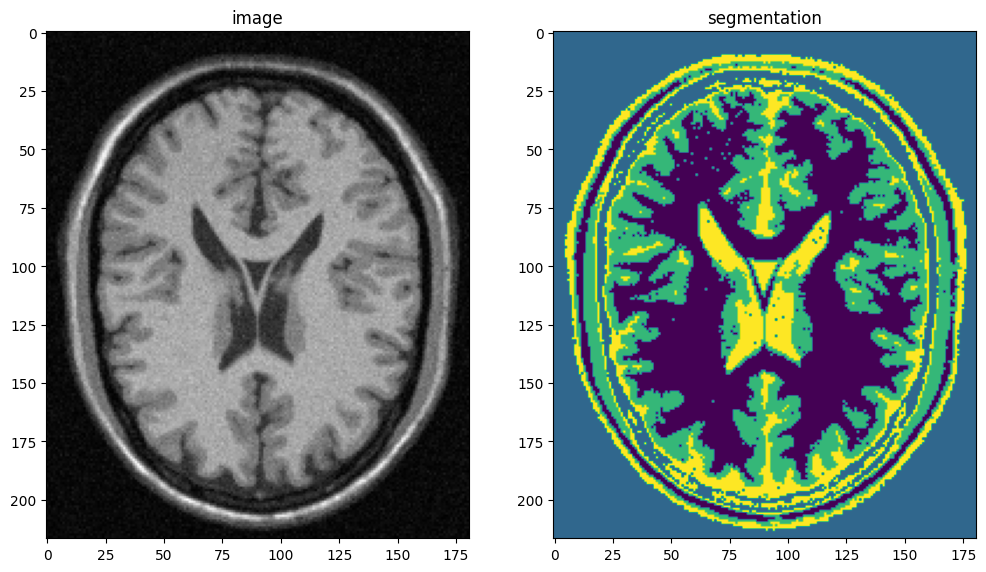

In [16]:
segment('/content/t1_icbm_normal_1mm_pn5_rf20.mnc')